<a href="https://colab.research.google.com/github/TalhaNasir55/Lungs_cancer/blob/main/lungs_cancer_prediction_using_KNearest_Neighbors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<Axes: xlabel='LUNG_CANCER', ylabel='count'>

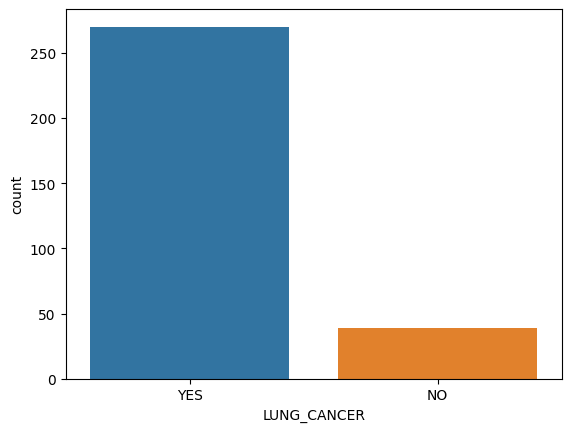

In [ ]:
sns.countplot(x='LUNG_CANCER',data=df)

In [ ]:
df['GENDER'] = df['GENDER'].replace({'M': 0, 'F': 1})

In [ ]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 0, 'NO': 1})

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df['LUNG_CANCER']
x=df.drop('LUNG_CANCER',axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
knn=KNeighborsRegressor(n_neighbors=7)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
knn_predictions=knn.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print(mean_absolute_error(knn_predictions,y_test))

0.21658986175115208


In [ ]:
errors=[]
for i in range(2,50):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_predictions=knn.predict(X_test)
    m_error=mean_absolute_error(knn_predictions,y_test)
    errors.append(m_error)

In [ ]:
min_errors=min(errors)

In [ ]:
min_errors

0.1881720430107527

In [ ]:
errors.index(min_errors)

0